<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M4%20Enunciados%20Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÓDULO 4 - PLATAFORMAS DE VISUALIZACIÓN**

---

**SESIÓN: Prepárate para aplicar | Explorando el índice de felicidad**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
happiness = pd.read_csv("/content/drive/MyDrive/Archivos Collab/M4/happiness_report.csv")
countries = pd.read_csv("/content/drive/MyDrive/Archivos Collab/M4/world_table_country.csv")

# **Pregunta 1**
Usa los atributos y funciones estudiadas para familiarizarte con la estructura y contenido del dataframe (`shape`, `columns`, `head()`, `tail()`, `isna()`)

In [64]:
happiness.head()
#happiness.columns
#happiness.shape
#happiness.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
countries.head()
#countries.shape

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,56.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,62.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,34.0


# **Pregunta 2**

A través de la función `describe()` responde:
*   ¿Cuál es el máximo valor de felicidad? ¿El mínimo?
*   ¿El factor con mayor desviación estándar? ¿La menor? ¿Qué significa?
*   ¿Cuál es el valor del 3er cuartil en la percepción de corrupción ¿Cómo se interpreta?

In [43]:
stats_h = happiness.describe().T
stats_h

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [44]:
stats_h.loc['Score', 'max']

7.769

In [53]:
stats_h.loc['GDP per capita':'Perceptions of corruption', 'std'].max()

0.39838946424220284

In [54]:
stats_h.loc['Perceptions of corruption', '75%']

0.14125

In [12]:
countries.describe().T

,count,mean,std,min,25%,50%,75%,max
SurfaceArea,239.0,6.232481e+05,1.924140e+06,0.4,2275.00,71740.00,398754.50,1.707540e+07
IndepYear,192.0,1.847260e+03,4.208314e+02,-1523.0,1906.75,1960.00,1974.00,1.994000e+03
Population,239.0,2.543410e+07,1.093398e+08,0.0,238000.00,3869000.00,14935500.00,1.277558e+09
LifeExpectancy,222.0,6.648604e+01,1.151927e+01,37.2,60.30,70.15,75.50,8.350000e+01
GNP,239.0,1.228239e+05,6.379976e+05,0.0,640.00,4787.00,29944.50,8.510700e+06
GNPOld,178.0,1.655343e+05,7.204689e+05,157.0,2187.00,8421.00,71145.50,8.110900e+06
Capital,232.0,2.071306e+03,1.184096e+03,1.0,915.75,2449.50,3065.25,4.074000e+03


# **Pregunta 3**

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores

<ipython-input-68-de3ce93fcbbd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df.drop('Overall rank', axis=1, inplace=True)


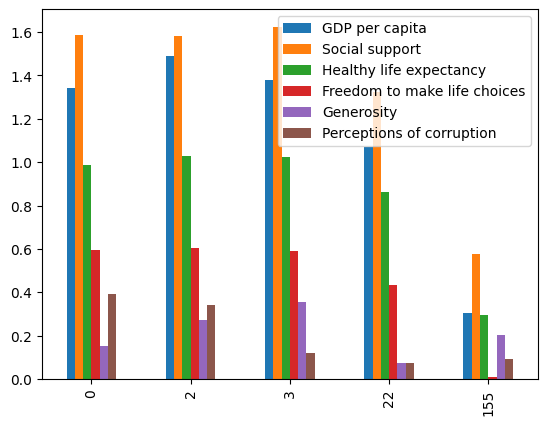

In [68]:
nuevo_df = happiness.loc[(happiness['Score'] == happiness['Score'].max()) |
                         (happiness['Score'] == happiness['Score'].min()) |
                         (happiness['Country or region'] == 'Mexico') |
                         (happiness['Country or region'] == 'Iceland') |
                         (happiness['Country or region'] == 'Norway'), :]

nuevo_df.drop('Overall rank', axis=1, inplace=True)
#nuevo_df.drop('Score', axis=1, inplace=True)

#nuevo_df.set_index('Country or region', inplace=True)
nuevo_df.loc[:, 'GDP per capita':'Perceptions of corruption'].plot(kind='bar')

#nuevo_df.plot(kind='bar')
plt.show()


In [46]:
happiness_mp = happiness[happiness['Country or region'].isin(['Mexico', 'Iceland', 'Norway'])]
happiness_mp

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073


# **Pregunta 4**
Del dataframe original obtén:
*   Histograma del puntaje (score) ¿Cuál es el rango de puntaje más frecuente?
*   Box plot de la esperanza de vida (Healthy life expectancy) ¿Cómo se interpreta?
*   Subplots de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores
*   ¿Qué factor influye más en la evaluación? ¿Cuál influye menos?
*   Compruebe lo anterior con un heatmap

<Axes: xlabel='Score', ylabel='Count'>

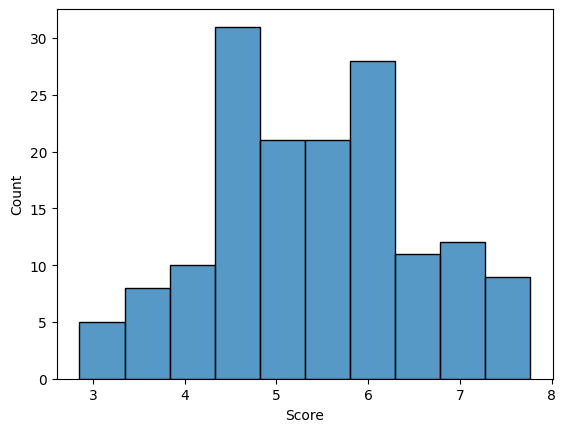

In [36]:
sns.histplot(happiness['Score'], bins=10)

<Axes: ylabel='Healthy life expectancy'>

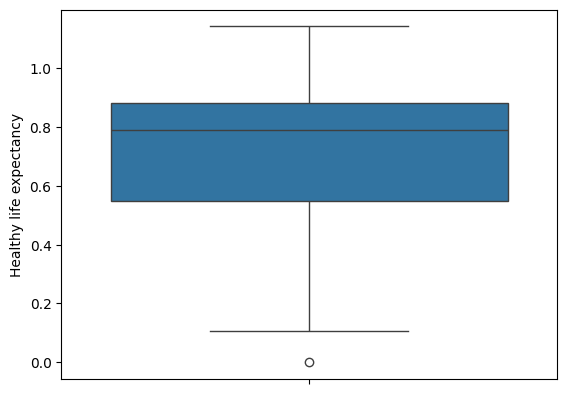

In [37]:
sns.boxplot(happiness['Healthy life expectancy'])
#0.8 mediana
#25% 0.56
#75% 0.85

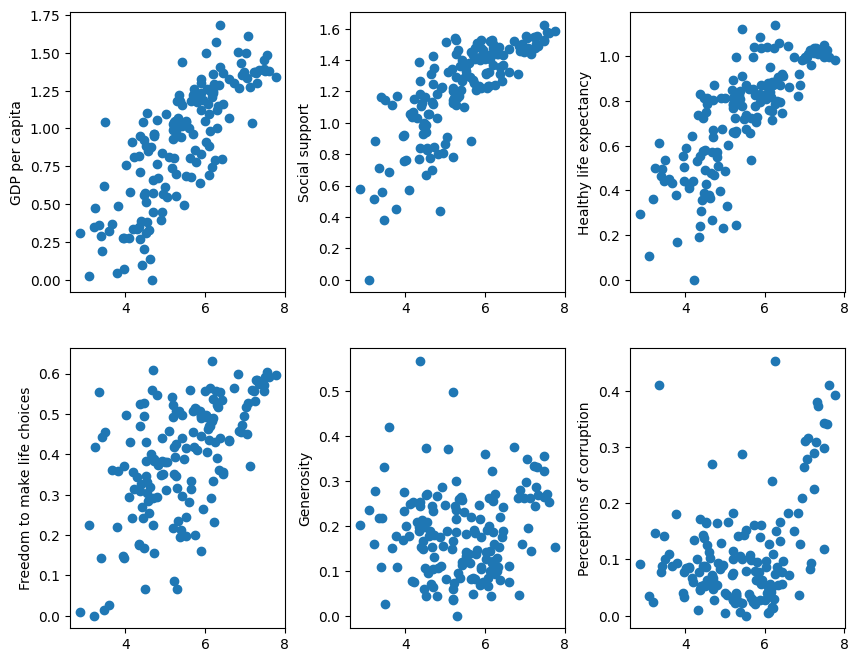

In [75]:
#fig, axs = plt.subplots(2, 3, figsize=(20, 10))
#axs = axs.ravel()
#nuevo_df.plot(kind='scatter', subplots = True, layout=(2,3))
#sns.pairplot(nuevo_df)

#for i, col in enumerate(nuevo_df.columns):
#  axs[i].scatter(nuevo_df['Score'], nuevo_df[col])
#  axs[i].set_ylabel(col)

fig, axs = plt.subplots(2,3,figsize=(10,8))
plt.subplots_adjust(wspace=0.3)
columns = happiness.loc[:,'GDP per capita':'Perceptions of corruption'].columns
for column, ax in zip(columns, axs.ravel()):
  ax.scatter(x=happiness['Score'], y=happiness[column])
  ax.set_ylabel(column)


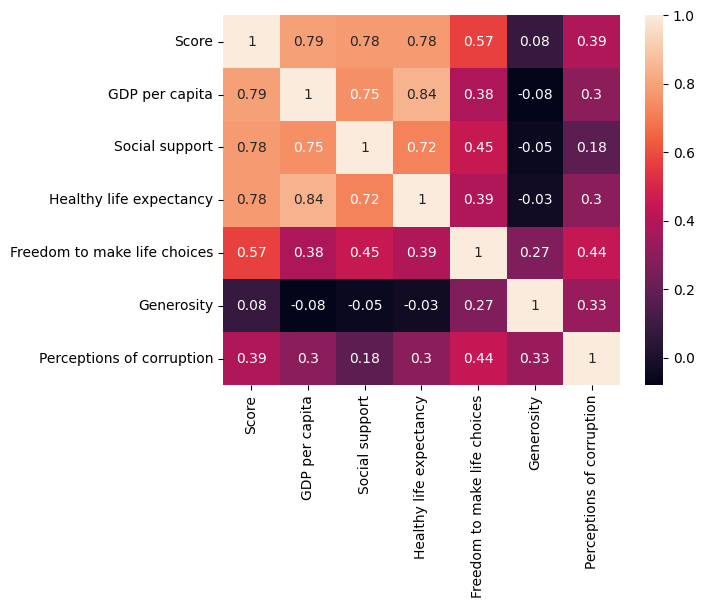

In [89]:
ht_df = happiness.loc[:,'Score':'Perceptions of corruption']
sns.heatmap(round(ht_df.corr(),2), annot = True)
plt.show()

# **Pregunta 5**

Combina con el dataframe `countries` (world_table_country.csv) para graficar la felicidad promedio por continente

<Axes: xlabel='Continent'>

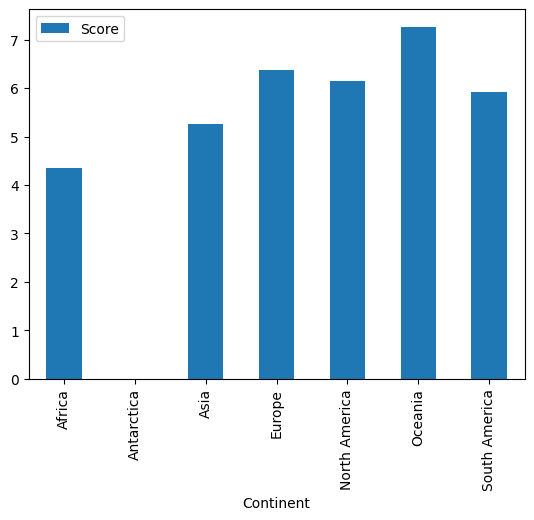

In [87]:
merge = countries.merge(happiness, left_on='Name', right_on='Country or region', how='left')
#merge.isna().sum()
#happiness.isna().sum()

merge_mean = merge.groupby(by='Continent').agg({'Score': np.mean})
merge_mean.plot(kind='bar')